In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df_ddt = pd.read_csv('data_demo/ddt_righe.csv')
df_ddt

,COD_CF_Fornitore,Data_documento,ID_documento,Descrizione,Codice_articolo,Codice_variante,Codice_categoria,Unita_misura,Quantita_um,Prezzo_netto_vu,importo
0,2521,2016-09-19,2016-BADDV-0000001,ANTA APR. DX IN CRISTALLO SATINATO 895x2040,017.PM107.001,0,10.30.40.10.20,PZ,16.00,94.00000,1504.00
1,2521,2016-09-19,2016-BADDV-0000001,ANTA APR. SX IN CRISTALLO SATINATO 895x2040,017.PM107.003,0,10.30.40.10.20,PZ,33.00,94.00000,3102.00
2,2521,2016-09-19,2016-BADDV-0000001,VETRO STRATIFICATO 3+3,017.PM152,3,10.30.40.10.10,MQ,31.48,23.58132,742.34
3,2521,2016-09-19,2016-BADDV-0000001,VETRO STRATIFICATO TRASPARENTE 5+5,090.VST55,309,10.30.40.10.50,MQ,64.39,20.50008,1320.00
4,1964,2016-09-21,2016-BADDV-0000002,VETRO STRATIFICATO TRASPARENTE 5+5,090.VST55,332,10.30.40.10.50,MQ,4.77,25.00000,119.25
...,...,...,...,...,...,...,...,...,...,...,...
20443,1964,2024-03-15,2024-BADDV-0000447,VETRO TRASPARENTE STRATIFICATO 3+3 F.G. ANTA I...,090.VST33,351,10.30.40.10.50,MQ,13.87,25.00000,346.75
20444,1964,2024-03-15,2024-BADDV-0000447,VETRO TRASPARENTE STRATIFICATO 3+3 F.G. ANTA I...,090.VST33,791,10.30.40.10.50,MQ,1.90,25.00000,47.50
20445,1964,2024-03-18,2024-BADDV-0000448,VETROCAMERA ANG. 90° TR. 904X950 SU PORTA SERI...,052.MP.VT.POR.TR.45.04,0,20.30.050,PZ,4.00,0.00000,0.00
20446,1964,2024-03-18,2024-BADDV-0000448,VETROCAMERA ANG. 90° TR. 904X950 SU PORTA SERI...,052.MP.VT.POR.TR.45.04,0,20.30.050,PZ,1.00,0.00000,0.00


In [3]:
#codice_articolo	Codice_variante	Descrizione	Costo	Data_riferimento	Categoria
#c415	027.101TEL.H	0	TELAIO PER PORTA LEGNO 898x2977	70.0	2022-11-28	Truciolare

In [4]:
df_027 = df_ddt[df_ddt["Codice_articolo"] == "027.101TEL.H"].copy()
df_027 = df_027[df_027["Codice_variante"] == 0][["Data_documento", "Prezzo_netto_vu"]]
df_027["Data_documento"] = pd.to_datetime(df_027["Data_documento"])
df_027["Month"] = df_027["Data_documento"].dt.to_period("M")
df_027.sort_values("Data_documento", inplace=True)
df_027 = df_027.groupby(["Month"]).mean()
# add rows for missing months
df_027 = df_027.reindex(pd.period_range(start=df_027.index.min(), end=df_027.index.max(), freq="M"))
df_027["Prezzo_netto_vu"].ffill(inplace=True)
df_027["Prezzo_netto_vu_MA"] = df_027["Prezzo_netto_vu"].rolling(window=6).mean()
df_027["Prezzo_listino"] = 70
# whre Data_documento <= 2022-11-28 set prezzo_listino = NaN
df_027.loc[df_027.index <= "2022-11", "Prezzo_listino"] = np.nan
# remove the first 20 rows
df_027 = df_027.iloc[20:]
# drop column "Data_documento"
df_027.drop(columns=["Data_documento"], inplace=True)
df_027["Discostamento"] = df_027["Prezzo_netto_vu_MA"] - df_027["Prezzo_listino"]
df_027

/tmp/ipykernel_10681/1716884959.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_027["Prezzo_netto_vu"].ffill(inplace=True)


,Prezzo_netto_vu,Prezzo_netto_vu_MA,Prezzo_listino,Discostamento
2018-09,110.000000,85.000000,NaN,NaN
2018-10,100.000000,93.333333,NaN,NaN
2018-11,100.000000,101.666667,NaN,NaN
2018-12,106.666667,102.777778,NaN,NaN
2019-01,200.000000,119.444444,NaN,NaN
...,...,...,...,...
2023-09,80.000000,85.641026,70.0,15.641026
2023-10,106.666667,90.085470,70.0,20.085470
2023-11,106.666667,88.888889,70.0,18.888889
2023-12,95.000000,91.388889,70.0,21.388889


In [5]:
(106.666667 + 95.000000 + 155.000000)/3

118.888889

In [6]:
# predict the next 3 months of Prezzo_netto_vu_MA using a linear regressionq
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictions = []
model = Lasso()
X = df_027[["Prezzo_netto_vu_MA"]].shift(-1).iloc[:-1]
y = df_027[["Prezzo_netto_vu_MA"]].iloc[:-1]
model.fit(X, y)
X_pred = df_027["Prezzo_netto_vu_MA"].iloc[-1:].values.reshape(-1, 1)
y_pred = model.predict(X_pred)
predictions.append(y_pred[0])
y_pred2 = model.predict(y_pred.reshape(-1, 1))
predictions.append(y_pred2[0])
y_pred3 = model.predict(y_pred2.reshape(-1, 1))
predictions.append(y_pred3[0])
predictions = [p + 15 for p in predictions]
predictions

/home/davide/Desktop/LISTINO_DDT/LISTINO_DDT/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/home/davide/Desktop/LISTINO_DDT/LISTINO_DDT/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/home/davide/Desktop/LISTINO_DDT/LISTINO_DDT/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


[117.27116962942031, 115.76039290532012, 114.34948906849944]

In [7]:
df_predictions = pd.DataFrame({"Prediction_Prezzo_netto_vu_MA": predictions})
df_predictions.index = pd.period_range(start=df_027.index.max() + 1, periods=3, freq="M")
df_predictions

,Prediction_Prezzo_netto_vu_MA
2024-02,117.271170
2024-03,115.760393
2024-04,114.349489


In [8]:
(117.271170 +  115.760393 + 114.349489) /3

115.793684

In [9]:
df_027 = pd.concat([df_027, df_predictions])
df_027

,Prezzo_netto_vu,Prezzo_netto_vu_MA,Prezzo_listino,Discostamento,Prediction_Prezzo_netto_vu_MA
2018-09,110.000000,85.000000,NaN,NaN,NaN
2018-10,100.000000,93.333333,NaN,NaN,NaN
2018-11,100.000000,101.666667,NaN,NaN,NaN
2018-12,106.666667,102.777778,NaN,NaN,NaN
2019-01,200.000000,119.444444,NaN,NaN,NaN
...,...,...,...,...,...
2023-12,95.000000,91.388889,70.0,21.388889,NaN
2024-01,155.000000,103.888889,70.0,33.888889,NaN
2024-02,NaN,NaN,NaN,NaN,117.271170
2024-03,NaN,NaN,NaN,NaN,115.760393


In [10]:
# set last nan of Prezzo_netto_vu_MA to the first value of the predictions
df_027["Prezzo_netto_vu_MA"].iloc[-3] = predictions[0]
df_027

/tmp/ipykernel_10681/2654972814.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_027["Prezzo_netto_vu_MA"].iloc[-3] = predictions[0]


,Prezzo_netto_vu,Prezzo_netto_vu_MA,Prezzo_listino,Discostamento,Prediction_Prezzo_netto_vu_MA
2018-09,110.000000,85.000000,NaN,NaN,NaN
2018-10,100.000000,93.333333,NaN,NaN,NaN
2018-11,100.000000,101.666667,NaN,NaN,NaN
2018-12,106.666667,102.777778,NaN,NaN,NaN
2019-01,200.000000,119.444444,NaN,NaN,NaN
...,...,...,...,...,...
2023-12,95.000000,91.388889,70.0,21.388889,NaN
2024-01,155.000000,103.888889,70.0,33.888889,NaN
2024-02,NaN,117.271170,NaN,NaN,117.271170
2024-03,NaN,NaN,NaN,NaN,115.760393


<Axes: >

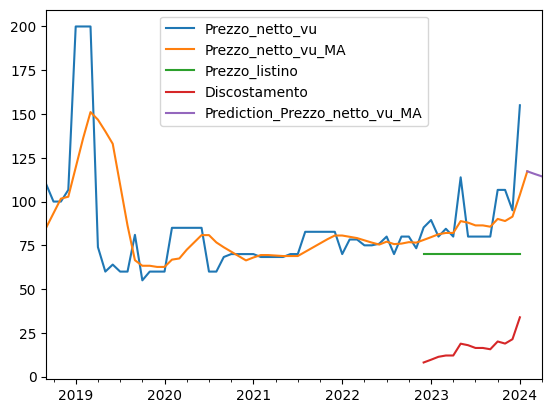

In [11]:
df_027.plot()

In [12]:
df_027.to_csv("esempio_prod.csv")

In [13]:
df_ddt = pd.read_csv('data_demo/ddt_righe.csv')
df_ddt

,COD_CF_Fornitore,Data_documento,ID_documento,Descrizione,Codice_articolo,Codice_variante,Codice_categoria,Unita_misura,Quantita_um,Prezzo_netto_vu,importo
0,2521,2016-09-19,2016-BADDV-0000001,ANTA APR. DX IN CRISTALLO SATINATO 895x2040,017.PM107.001,0,10.30.40.10.20,PZ,16.00,94.00000,1504.00
1,2521,2016-09-19,2016-BADDV-0000001,ANTA APR. SX IN CRISTALLO SATINATO 895x2040,017.PM107.003,0,10.30.40.10.20,PZ,33.00,94.00000,3102.00
2,2521,2016-09-19,2016-BADDV-0000001,VETRO STRATIFICATO 3+3,017.PM152,3,10.30.40.10.10,MQ,31.48,23.58132,742.34
3,2521,2016-09-19,2016-BADDV-0000001,VETRO STRATIFICATO TRASPARENTE 5+5,090.VST55,309,10.30.40.10.50,MQ,64.39,20.50008,1320.00
4,1964,2016-09-21,2016-BADDV-0000002,VETRO STRATIFICATO TRASPARENTE 5+5,090.VST55,332,10.30.40.10.50,MQ,4.77,25.00000,119.25
...,...,...,...,...,...,...,...,...,...,...,...
20443,1964,2024-03-15,2024-BADDV-0000447,VETRO TRASPARENTE STRATIFICATO 3+3 F.G. ANTA I...,090.VST33,351,10.30.40.10.50,MQ,13.87,25.00000,346.75
20444,1964,2024-03-15,2024-BADDV-0000447,VETRO TRASPARENTE STRATIFICATO 3+3 F.G. ANTA I...,090.VST33,791,10.30.40.10.50,MQ,1.90,25.00000,47.50
20445,1964,2024-03-18,2024-BADDV-0000448,VETROCAMERA ANG. 90° TR. 904X950 SU PORTA SERI...,052.MP.VT.POR.TR.45.04,0,20.30.050,PZ,4.00,0.00000,0.00
20446,1964,2024-03-18,2024-BADDV-0000448,VETROCAMERA ANG. 90° TR. 904X950 SU PORTA SERI...,052.MP.VT.POR.TR.45.04,0,20.30.050,PZ,1.00,0.00000,0.00


In [14]:
#check if the same Codice_articolo has different Codice_categoria
error_rows = df_ddt.groupby('Codice_articolo')['Codice_categoria'].nunique()
error_rows = error_rows[error_rows > 1]
error_rows

Codice_articolo
052.MP.CTS.SPS.007    2
052.MP.CTS.SPS.008    2
052.MP.CTS.SPS.009    2
052.MP.CTS.SPS.010    2
Name: Codice_categoria, dtype: int64

In [15]:
error_rows = df_ddt.groupby(['Codice_articolo','Codice_variante'])['Codice_categoria'].nunique()
error_rows = error_rows[error_rows > 1]
error_rows

Codice_articolo     Codice_variante
052.MP.CTS.SPS.007  0                  2
052.MP.CTS.SPS.008  0                  2
052.MP.CTS.SPS.009  0                  2
052.MP.CTS.SPS.010  0                  2
Name: Codice_categoria, dtype: int64

In [16]:
error_rows = df_ddt.groupby(['Codice_articolo','Codice_variante'])['Descrizione'].nunique()
error_rows = error_rows[error_rows > 1]
error_rows

Codice_articolo   Codice_variante
017.PM001         3                   2
                  29                  4
017.PM002         21                  4
                  24                  2
017.PM002.08      0                  10
                                     ..
092.GU001.12.N    0                   2
092.GU002.AI      0                   2
092.GU002.TP      0                   5
092.NW2533PLM     0                   2
093.PM001.LLV.10  0                   2
Name: Descrizione, Length: 605, dtype: int64

In [17]:
df_prezzi_vendita = df_ddt.groupby(['Codice_articolo','Codice_variante'])[['Prezzo_netto_vu']].agg(['mean','std', 'max', 'min'])
df_prezzi_vendita["STD %"] = df_prezzi_vendita[('Prezzo_netto_vu', 'std')] / df_prezzi_vendita[('Prezzo_netto_vu', 'mean')] * 100
df_prezzi_vendita

Prezzo_netto_vu                       \
                                            mean        std       max   
Codice_articolo  Codice_variante                                        
017.GUI.MED.01   0                      0.350000        NaN   0.35000   
017.PM001        3                      0.858000   0.223064   1.25000   
                 4                      0.700000        NaN   0.70000   
                 5                      1.070080   0.240529   1.24016   
                 6                      0.620000        NaN   0.62000   
...                                          ...        ...       ...   
092.NW2531LED    0                      3.690000        NaN   3.69000   
092.NW2533PLM    0                      1.338067   0.507357   2.49000   
093.PM001.LLV.10 0                      7.000000   4.472136  15.00000   
093.PM001.LLV.12 0                      5.000000        NaN   5.00000   
0MAG.0002        0                     45.000000  21.213203  60.00000   

                                               STD %  
                                      min             
Codice_articolo  Codice_variante                      
017.GUI.MED.01   0                 0.3500        NaN  
017.PM001        3                 0.7200  25.998123  
                 4                 0.7000        NaN  
                 5                 0.9000  22.477707  
                 6                 0.6200        NaN  
...                                   ...        ...  
092.NW2531LED    0                 3.6900        NaN  
092.NW2533PLM    0                 0.9009  37.917162  
093.PM001.LLV.10 0                 5.0000  63.887656  
093.PM001.LLV.12 0                 5.0000        NaN  
0MAG.0002        0                30.0000  47.140452  

[10996 rows x 5 columns]

In [18]:
# count nan values
df_prezzi_vendita["STD %"].isnull().sum()

9170

In [19]:
10996 - 9170

1826

In [20]:
100 * 9170/10996

83.39396144052382

In [21]:
len(df_prezzi_vendita[df_prezzi_vendita["STD %"] > 10])

778

In [22]:
len(df_prezzi_vendita[df_prezzi_vendita["STD %"] > 50])

143

In [23]:
len(df_prezzi_vendita[df_prezzi_vendita["STD %"] > 100])

32

In [24]:
fig = px.histogram(df_prezzi_vendita, x='STD %', template='plotly_white', title='STD % Prezzo Netto Vendita')
fig.show()

In [25]:
fig = px.histogram(df_prezzi_vendita, x='STD %', template='plotly_white', title='STD % Prezzo Netto Vendita', nbins=20)
fig.show()

In [26]:
# remove multiindex on columns
df_prezzi_vendita.columns = df_prezzi_vendita.columns.get_level_values(1)   
df_prezzi_vendita

mean        std       max      min  \
Codice_articolo  Codice_variante                                            
017.GUI.MED.01   0                 0.350000        NaN   0.35000   0.3500   
017.PM001        3                 0.858000   0.223064   1.25000   0.7200   
                 4                 0.700000        NaN   0.70000   0.7000   
                 5                 1.070080   0.240529   1.24016   0.9000   
                 6                 0.620000        NaN   0.62000   0.6200   
...                                     ...        ...       ...      ...   
092.NW2531LED    0                 3.690000        NaN   3.69000   3.6900   
092.NW2533PLM    0                 1.338067   0.507357   2.49000   0.9009   
093.PM001.LLV.10 0                 7.000000   4.472136  15.00000   5.0000   
093.PM001.LLV.12 0                 5.000000        NaN   5.00000   5.0000   
0MAG.0002        0                45.000000  21.213203  60.00000  30.0000   

                                             
Codice_articolo  Codice_variante             
017.GUI.MED.01   0                      NaN  
017.PM001        3                25.998123  
                 4                      NaN  
                 5                22.477707  
                 6                      NaN  
...                                     ...  
092.NW2531LED    0                      NaN  
092.NW2533PLM    0                37.917162  
093.PM001.LLV.10 0                63.887656  
093.PM001.LLV.12 0                      NaN  
0MAG.0002        0                47.140452  

[10996 rows x 5 columns]

In [27]:
fig = px.scatter(df_prezzi_vendita.dropna(), x='mean', y='', template='plotly_white', title='STD % vs MEAN Prezzo Netto Vendita')
fig.show()

In [28]:
df_prev = df_ddt.groupby(['Codice_articolo','Codice_variante'])[['Prezzo_netto_vu']].count()
df_prev

Prezzo_netto_vu
Codice_articolo  Codice_variante                 
017.GUI.MED.01   0                              1
017.PM001        3                              5
                 4                              1
                 5                              2
                 6                              1
...                                           ...
092.NW2531LED    0                              1
092.NW2533PLM    0                              8
093.PM001.LLV.10 0                              5
093.PM001.LLV.12 0                              1
0MAG.0002        0                              2

[10996 rows x 1 columns]

In [29]:
df_prev[["Prezzo_netto_vu"]].sort_values(by='Prezzo_netto_vu', ascending=False)
df_prev

Prezzo_netto_vu
Codice_articolo  Codice_variante                 
017.GUI.MED.01   0                              1
017.PM001        3                              5
                 4                              1
                 5                              2
                 6                              1
...                                           ...
092.NW2531LED    0                              1
092.NW2533PLM    0                              8
093.PM001.LLV.10 0                              5
093.PM001.LLV.12 0                              1
0MAG.0002        0                              2

[10996 rows x 1 columns]

In [30]:
fig = px.histogram(df_prev, x='Prezzo_netto_vu', template='plotly_white', title='Dist storia')
fig.show()

In [80]:
df_codice = df_ddt[df_ddt["Codice_articolo"] == "017.PM507"].copy()
df_codice = df_codice[df_codice["Codice_variante"] == 0][["Data_documento", "Prezzo_netto_vu"]]
# remove day from date, keep only month and year
df_codice["Data_documento"] = pd.to_datetime(df_codice["Data_documento"]).dt.to_period("M")
#df_codice.set_index("Data_documento", inplace=True)
# average by month
df_codice = df_codice.groupby("Data_documento").mean()
# sort by date
#df_codice.sort_index(inplace=True)
# fill missing months
df_codice = df_codice.reindex(pd.period_range(start=df_codice.index.min(), end=df_codice.index.max(), freq="M"))
df_codice = df_codice[["Prezzo_netto_vu"]].ffill()
df_codice

,Prezzo_netto_vu
2016-11,15.000000
2016-12,15.000000
2017-01,8.375000
2017-02,8.375000
2017-03,8.375000
...,...
2023-11,5.000000
2023-12,18.043214
2024-01,386.000143
2024-02,16.904000


In [81]:
fig = px.line(df_codice, y='Prezzo_netto_vu', template='plotly_white', title='Prezzo Netto Vendita 017.PM507')
fig.show()

TypeError: Object of type Period is not JSON serializable

In [33]:
df_027 = df_ddt[df_ddt["Codice_articolo"] == "027.101TEL.H"].copy()
df_027 = df_027[df_027["Codice_variante"] == 0][["Prezzo_netto_vu"]]
df_027.index = [i for i in range(len(df_027))]
df_027

,Prezzo_netto_vu
0,50.0
1,55.0
2,50.0
3,50.0
4,50.0
...,...
267,80.0
268,80.0
269,80.0
270,80.0


In [34]:
fig = px.line(df_027, y='Prezzo_netto_vu', template='plotly_white', title='Prezzo Netto Vendita 027.101TEL.H')
fig.show()

In [35]:
df_027["MA"] = df_027["Prezzo_netto_vu"].rolling(window=20).mean()
#remove nan values
df_027 = df_027.dropna()
df_027

,Prezzo_netto_vu,MA
19,100.0,96.75
20,100.0,99.25
21,100.0,101.50
22,100.0,104.00
23,50.0,104.00
...,...,...
267,80.0,103.00
268,80.0,103.00
269,80.0,103.00
270,80.0,103.00


In [36]:
fig = px.line(df_027, y='MA', template='plotly_white', title='Prezzo Netto Vendita 027.101TEL.H')
fig.show()

In [37]:
df_027["MA"].shift(-1).ffill()

19      99.25
20     101.50
21     104.00
22     104.00
23     107.50
        ...  
267    103.00
268    103.00
269    103.00
270    110.50
271    110.50
Name: MA, Length: 253, dtype: float64

In [38]:
# use liear regression to predict the price
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_027[["MA"]]
y = df_027[["MA"]].shift(-1).ffill()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42, shuffle=False)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df_pred = pd.DataFrame(data={'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()})

fig = px.line(df_pred, template='plotly_white', title='Prezzo acquisto 027.101TEL.H')
#fig.add_scatter(x=X_test.flatten(), y=y_pred, mode='lines')

fig.show()

/home/davide/Desktop/LISTINO_DDT/LISTINO_DDT/env/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [39]:
# calculate percentage error
res = 100*(abs(df_pred["y_test"] - df_pred["y_pred"])/df_pred["y_test"])

In [40]:
print(res.mean())
print(res.max())

1.9290266123327964
9.758042635658922


In [41]:
schema_permessi_utente = {
    "Read": ["V", "V", "V", "V"],
    "Create": ["X", "V", "V", "V"],
    "Update": ["X", "X", "V", "V"],
    "Delete": ["X", "X", "X", "V"]
}
df_schema_permessi_utente = pd.DataFrame(schema_permessi_utente)
df_schema_permessi_utente.index = ["SuperAdmin", "Admin", "Manager", "User"]
df_schema_permessi_utente

,Read,Create,Update,Delete
SuperAdmin,V,X,X,X
Admin,V,V,X,X
Manager,V,V,V,X
User,V,V,V,V


In [42]:
df_schema_permessi_utente.to_csv('schema_permessi_utente.csv')